DATASET OVERVIEW
Dataset shape: (100000, 31)

Diabetes stage distribution:
diabetes_stage
Type 2          59774
Pre-Diabetes    31845
No Diabetes      7981
Gestational       278
Type 1            122
Name: count, dtype: int64

Percentage distribution:
diabetes_stage
Type 2          59.77
Pre-Diabetes    31.85
No Diabetes      7.98
Gestational      0.28
Type 1           0.12
Name: count, dtype: float64

EXPLORATORY DATA ANALYSIS


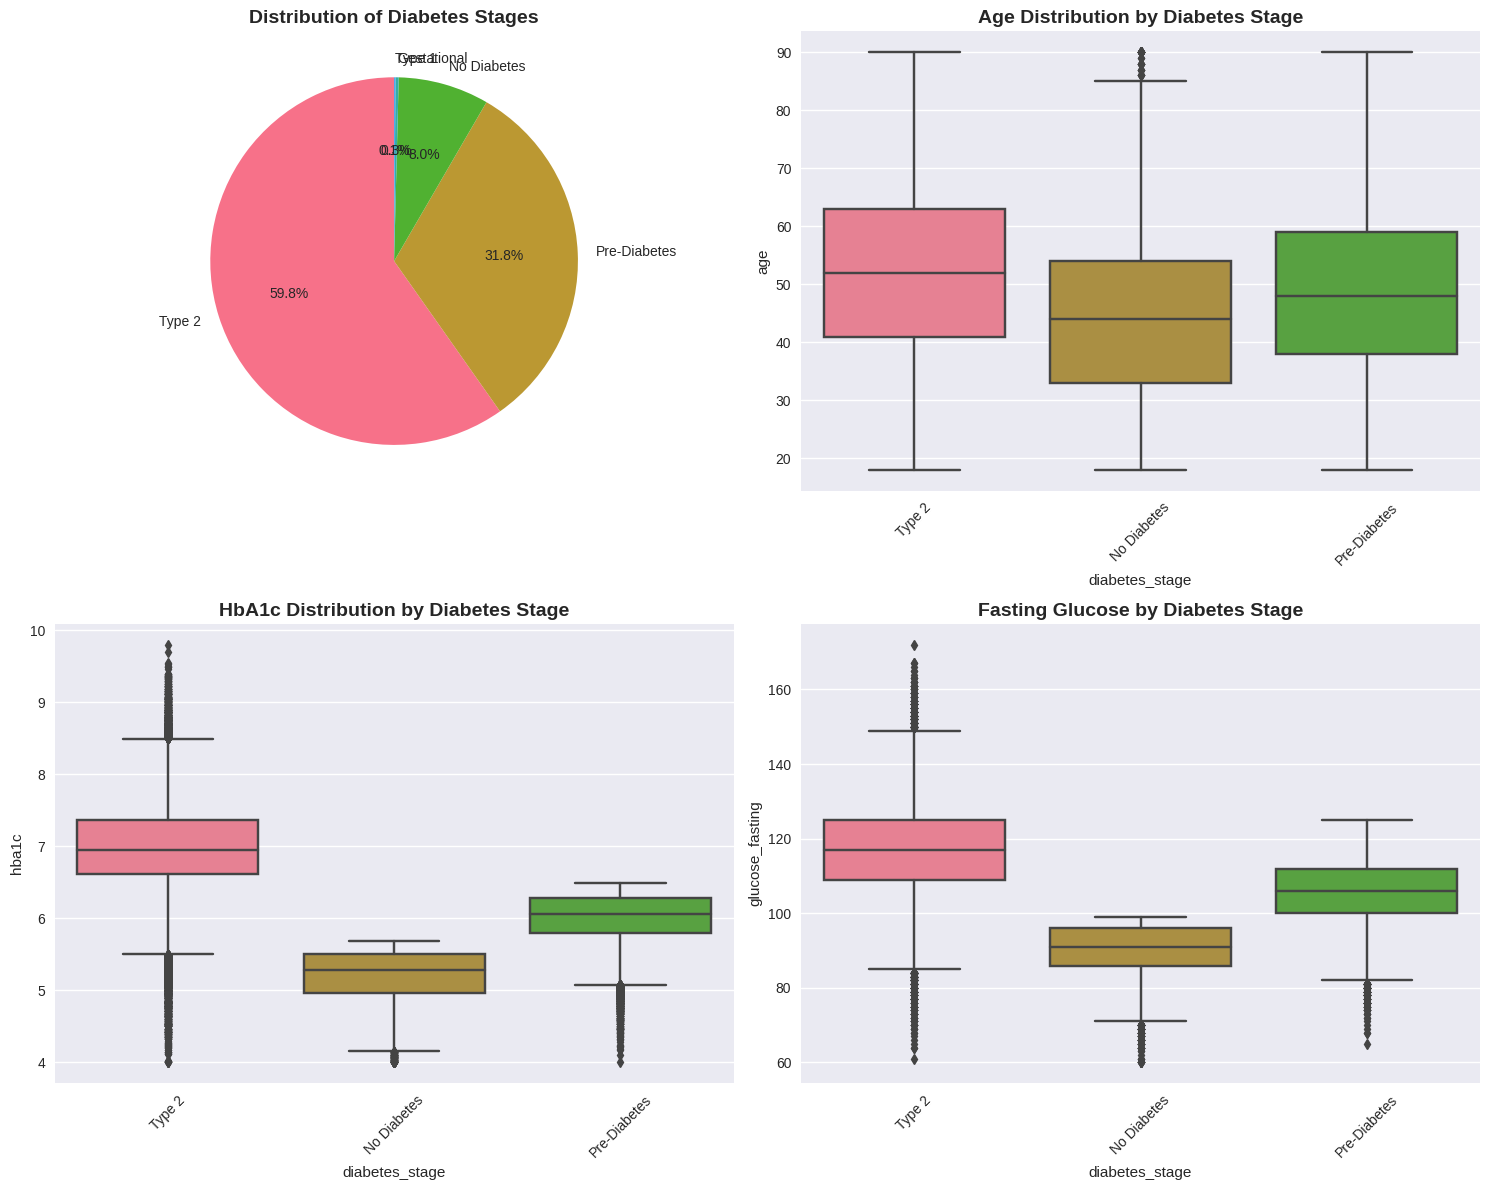


DATA PREPROCESSING
Combined diabetes stage distribution:
diabetes_stage_combined
Type 2          59774
Pre-Diabetes    31845
No Diabetes      7981
Other             400
Name: count, dtype: int64
Target classes: ['No Diabetes' 'Other' 'Pre-Diabetes' 'Type 2']
Target distribution: [ 7981   400 31845 59774]
Total features: 28
Training set size: 80000
Test set size: 20000
Categorical features indices: [22, 23, 24, 25, 26, 27]

MODEL TRAINING AND EVALUATION
Class weights: {0: 3.1323414252153485, 1: 62.5, 2: 0.7850525985241011, 3: 0.418243794307702}

Random Forest
------------------------------
Accuracy: 0.9185
Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.85      1.00      0.92      1596
       Other       0.00      0.00      0.00        80
Pre-Diabetes       0.83      1.00      0.91      6369
      Type 2       1.00      0.87      0.93     11955

    accuracy                           0.92     20000
   macro avg       0.67      0.72    

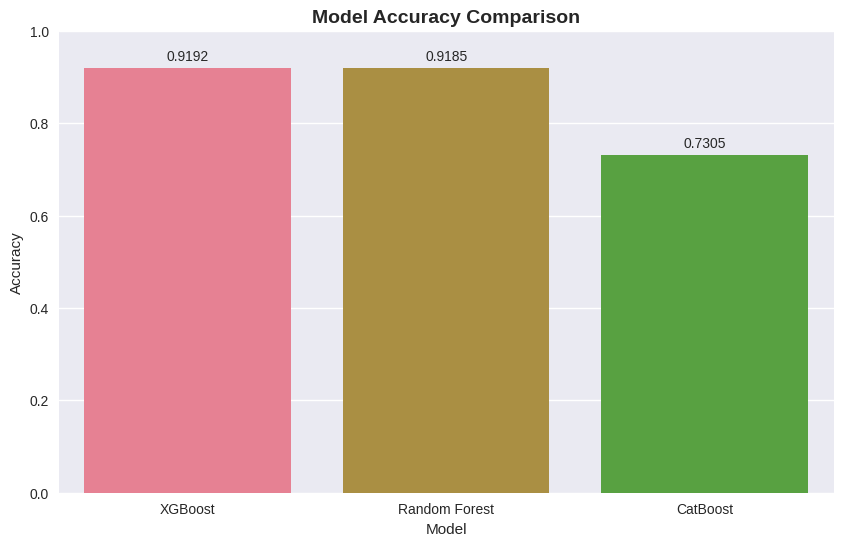


FEATURE IMPORTANCE ANALYSIS


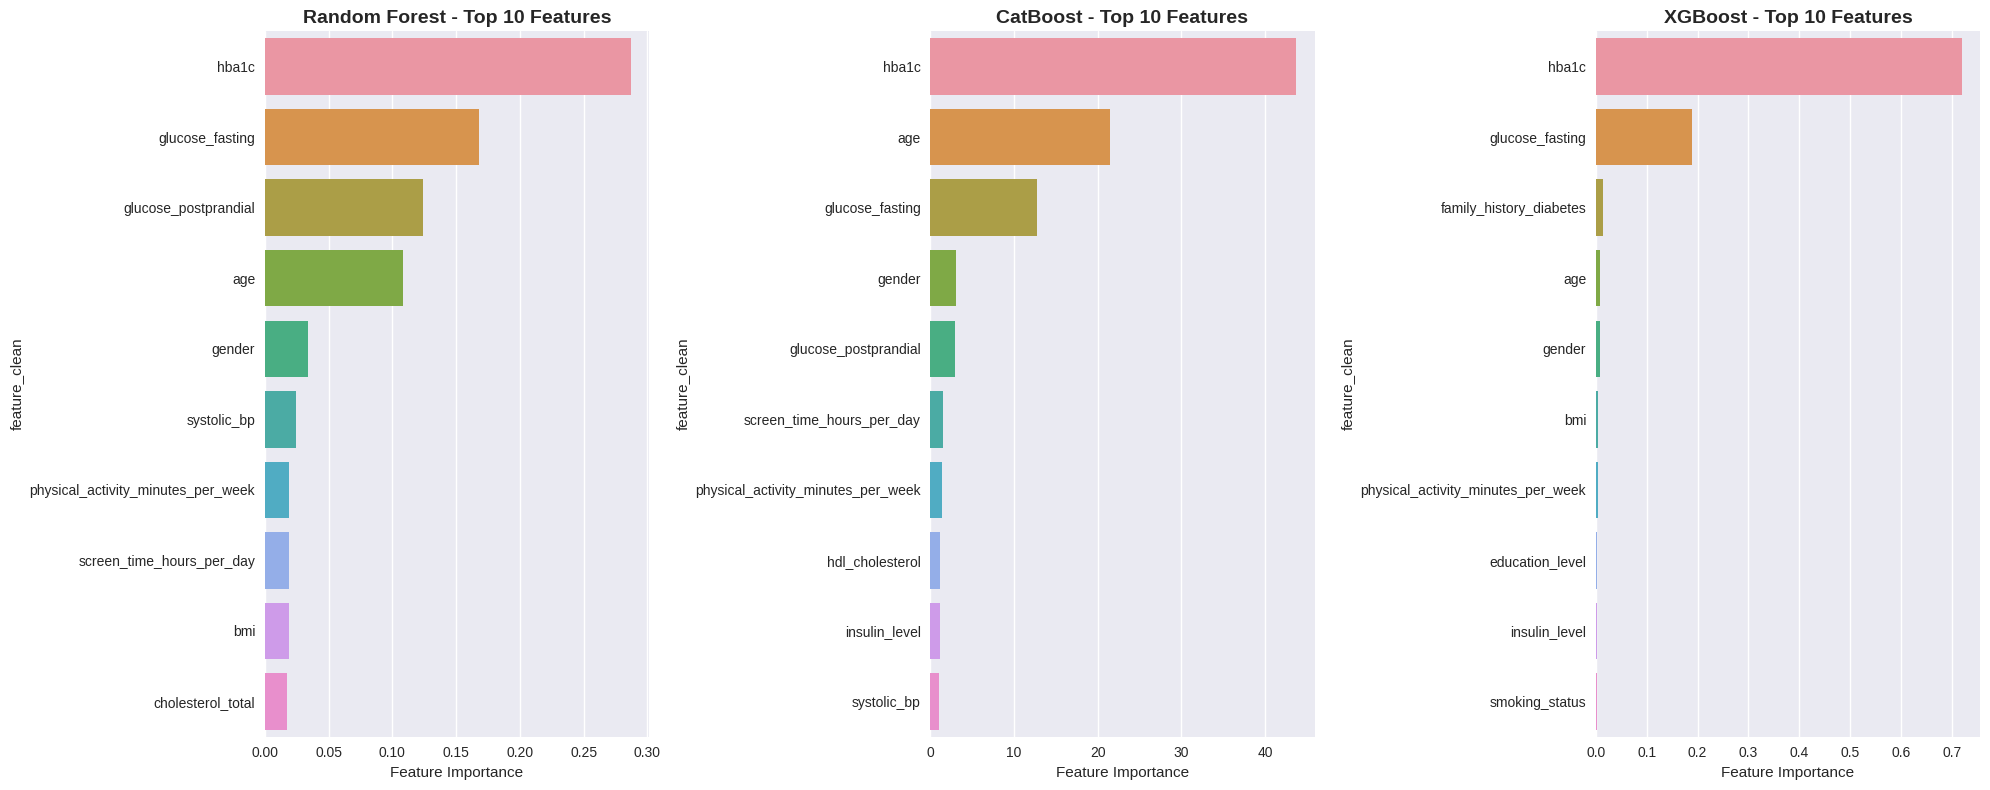


Random Forest - Top 10 Features:
  hba1c: 0.2870
  glucose_fasting: 0.1682
  glucose_postprandial: 0.1243
  age: 0.1084
  gender: 0.0340
  systolic_bp: 0.0243
  physical_activity_minutes_per_week: 0.0190
  screen_time_hours_per_day: 0.0188
  bmi: 0.0186
  cholesterol_total: 0.0176

CatBoost - Top 10 Features:
  hba1c: 43.7405
  age: 21.5169
  glucose_fasting: 12.7852
  gender: 3.0990
  glucose_postprandial: 2.9807
  screen_time_hours_per_day: 1.5390
  physical_activity_minutes_per_week: 1.3731
  hdl_cholesterol: 1.1409
  insulin_level: 1.1076
  systolic_bp: 1.0760

XGBoost - Top 10 Features:
  hba1c: 0.7193
  glucose_fasting: 0.1884
  family_history_diabetes: 0.0137
  age: 0.0088
  gender: 0.0072
  bmi: 0.0033
  physical_activity_minutes_per_week: 0.0032
  education_level: 0.0031
  insulin_level: 0.0030
  smoking_status: 0.0030

CONSENSUS FEATURE IMPORTANCE


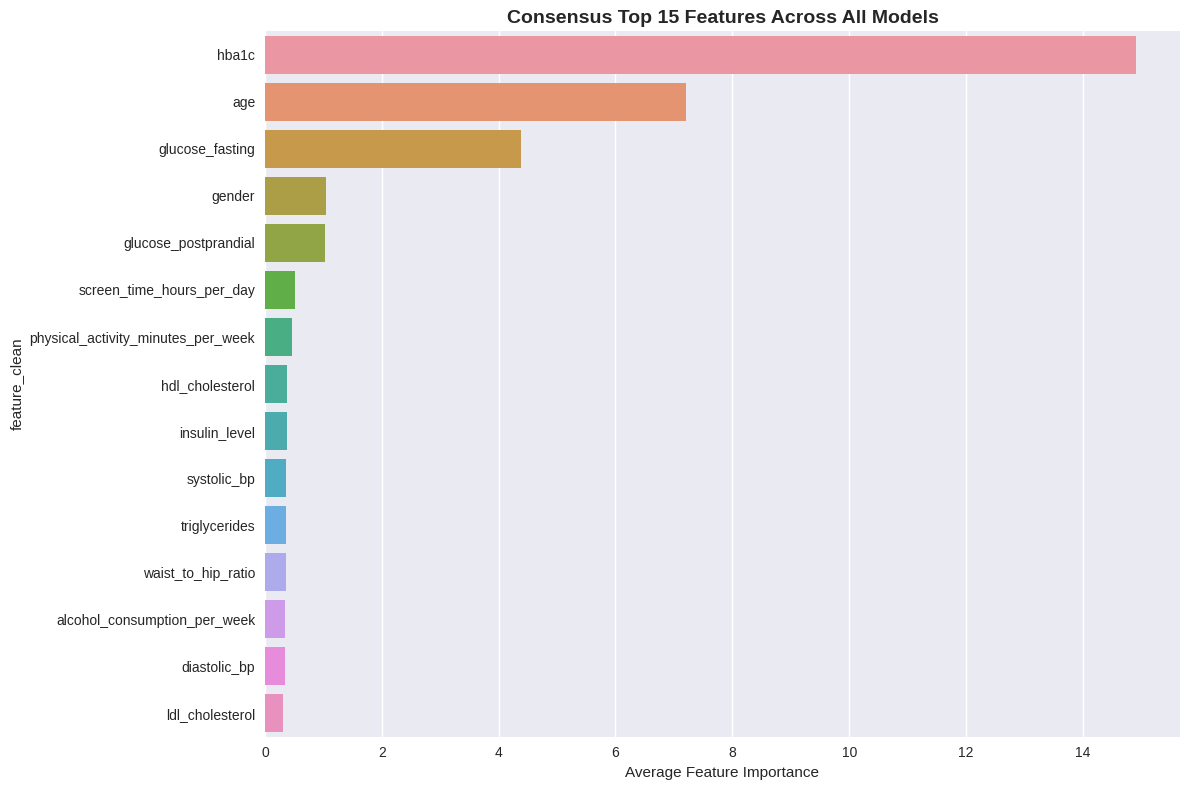


Consensus Top 10 Features (Average across all models):
  hba1c: 14.9156
  age: 7.2114
  glucose_fasting: 4.3806
  gender: 1.0467
  glucose_postprandial: 1.0360
  screen_time_hours_per_day: 0.5202
  physical_activity_minutes_per_week: 0.4651
  hdl_cholesterol: 0.3866
  insulin_level: 0.3755
  systolic_bp: 0.3678

DETAILED FEATURE ANALYSIS

Clinical Significance of Top Features:
• hba1c: 14.9156
  Glycated Hemoglobin - Long-term blood sugar control (3 months average)
• age: 7.2114
  Age - Diabetes risk increases with age
• glucose_fasting: 4.3806
  Fasting Blood Glucose - Sugar levels after 8+ hours fasting
• glucose_postprandial: 1.0360
  Post-meal Blood Glucose - Sugar levels 2 hours after eating

CONFUSION MATRICES


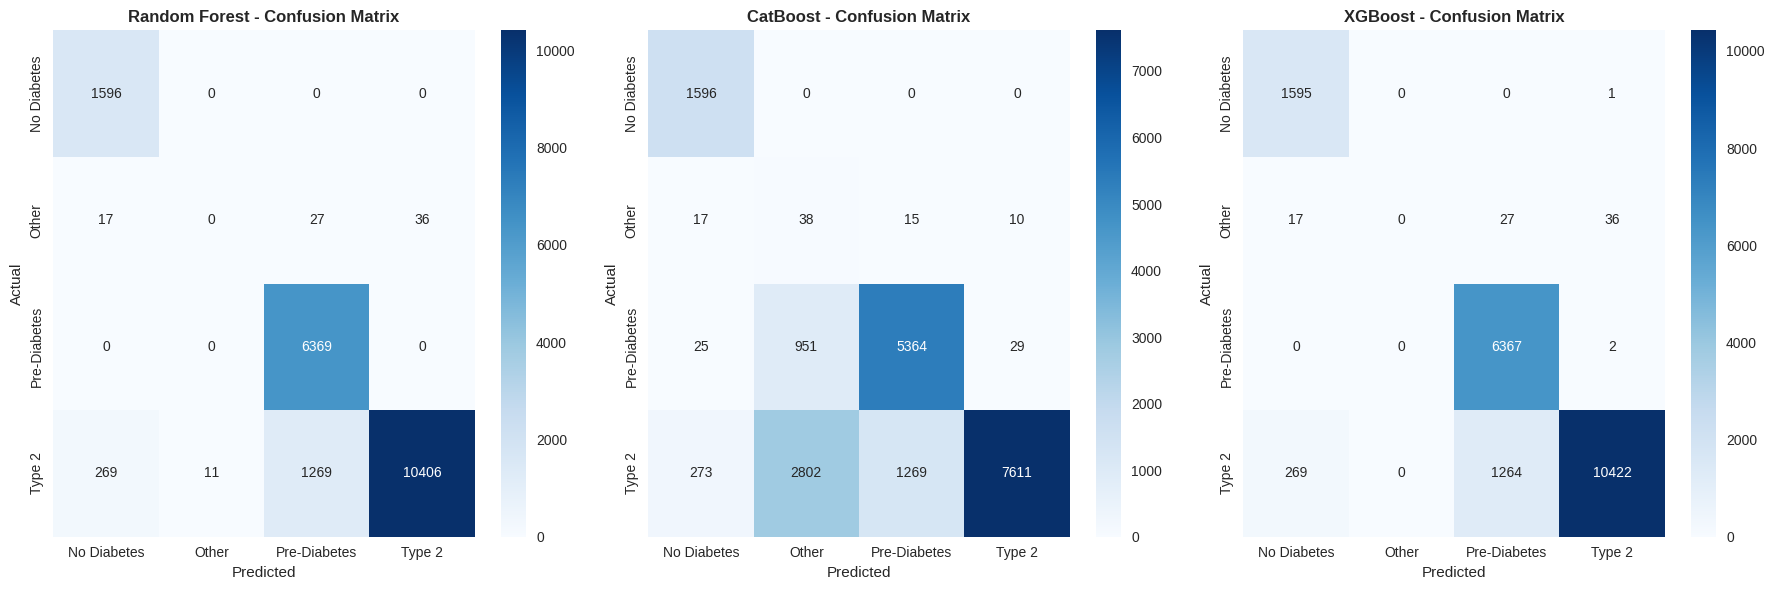


SUMMARY
1. DATA OVERVIEW:
   - Total samples: 100,000
   - Type 2 Diabetes: 59,774 (59.8%)
   - Pre-Diabetes: 31,845 (31.8%)
   - No Diabetes: 7,981 (8.0%)

2. MODEL PERFORMANCE:
   - Random Forest: 0.9185
   - CatBoost: 0.7305
   - XGBoost: 0.9192

3. KEY PREDICTORS:
   - hba1c: 14.9156
   - age: 7.2114
   - glucose_fasting: 4.3806
   - gender: 1.0467
   - glucose_postprandial: 1.0360

4. CLINICAL INSIGHTS:
   - HbA1c and glucose levels are strongest predictors
   - Age and BMI are significant risk factors
   - All models show consistent feature importance patterns

Results saved to:
- consensus_feature_importance.csv
- model_comparison.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the dataset
df = pd.read_csv('/kaggle/input/diabetes-health-indicators-dataset/diabetes_dataset.csv')

print("=" * 50)
print("DATASET OVERVIEW")
print("=" * 50)
print(f"Dataset shape: {df.shape}")
print(f"\nDiabetes stage distribution:")
print(df['diabetes_stage'].value_counts())
print(f"\nPercentage distribution:")
print((df['diabetes_stage'].value_counts() / len(df) * 100).round(2))

# EDA - Visualizations
print("\n" + "=" * 50)
print("EXPLORATORY DATA ANALYSIS")
print("=" * 50)

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Target variable distribution
diabetes_counts = df['diabetes_stage'].value_counts()
axes[0,0].pie(diabetes_counts.values, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Distribution of Diabetes Stages', fontsize=14, fontweight='bold')

# 2. Age distribution by diabetes stage
main_stages = ['No Diabetes', 'Pre-Diabetes', 'Type 2']
df_main = df[df['diabetes_stage'].isin(main_stages)]
sns.boxplot(data=df_main, x='diabetes_stage', y='age', ax=axes[0,1])
axes[0,1].set_title('Age Distribution by Diabetes Stage', fontsize=14, fontweight='bold')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. HbA1c distribution
sns.boxplot(data=df_main, x='diabetes_stage', y='hba1c', ax=axes[1,0])
axes[1,0].set_title('HbA1c Distribution by Diabetes Stage', fontsize=14, fontweight='bold')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Glucose fasting distribution
sns.boxplot(data=df_main, x='diabetes_stage', y='glucose_fasting', ax=axes[1,1])
axes[1,1].set_title('Fasting Glucose by Diabetes Stage', fontsize=14, fontweight='bold')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Data Preprocessing
print("\n" + "=" * 50)
print("DATA PREPROCESSING")
print("=" * 50)

# Create a copy for modeling
df_model = df.copy()

# Handle rare classes
df_model['diabetes_stage_combined'] = df_model['diabetes_stage']
rare_classes = ['Gestational', 'Type 1']
df_model.loc[df_model['diabetes_stage'].isin(rare_classes), 'diabetes_stage_combined'] = 'Other'

print("Combined diabetes stage distribution:")
stage_counts = df_model['diabetes_stage_combined'].value_counts()
print(stage_counts)

# Prepare features and target
categorical_columns = ['gender', 'ethnicity', 'education_level', 'income_level', 
                      'employment_status', 'smoking_status']

# Encode categorical variables
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_model[col + '_encoded'] = le.fit_transform(df_model[col].astype(str))
    label_encoders[col] = le

# Encode target variable
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(df_model['diabetes_stage_combined'])

print(f"Target classes: {target_encoder.classes_}")
print(f"Target distribution: {np.bincount(y)}")

# Define features - exclude target-related columns
exclude_columns = ['diabetes_stage', 'diagnosed_diabetes', 'diabetes_stage_combined', 
                  'diabetes_risk_score']

# Select feature columns
numerical_features = ['age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week',
                     'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day',
                     'family_history_diabetes', 'hypertension_history', 'cardiovascular_history',
                     'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
                     'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides',
                     'glucose_fasting', 'glucose_postprandial', 'insulin_level', 'hba1c']

feature_columns = []
feature_columns.extend([col for col in numerical_features if col in df_model.columns and col not in exclude_columns])
feature_columns.extend([col + '_encoded' for col in categorical_columns])

print(f"Total features: {len(feature_columns)}")

X = df_model[feature_columns]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Scale the features for models that require scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Prepare categorical features for CatBoost
cat_features_indices = [i for i, col in enumerate(feature_columns) if col.endswith('_encoded')]

print(f"Categorical features indices: {cat_features_indices}")

# Model Training and Evaluation
print("\n" + "=" * 50)
print("MODEL TRAINING AND EVALUATION")
print("=" * 50)

# Calculate class weights for imbalanced data
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

print(f"Class weights: {class_weights_dict}")

models = {
    'Random Forest': RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        max_depth=15,
        min_samples_split=5,
        min_samples_leaf=2,
        class_weight='balanced'
    ),
    'CatBoost': CatBoostClassifier(
        iterations=100,
        learning_rate=0.1,
        depth=6,
        random_state=42,
        verbose=False,
        auto_class_weights='Balanced' 
    ),
    'XGBoost': XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=6,
        random_state=42,
        eval_metric='mlogloss',
        use_label_encoder=False
    )
}

results = {}
feature_importances = {}

for model_name, model in models.items():
    print(f"\n{model_name}")
    print("-" * 30)
    
    # Train model
    if model_name == 'CatBoost':
        model.fit(X_train, y_train, cat_features=cat_features_indices)
        y_pred = model.predict(X_test)
        feature_imp = model.get_feature_importance()
    elif model_name == 'XGBoost':
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        feature_imp = model.feature_importances_
    else:  # Random Forest
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        feature_imp = model.feature_importances_
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = {
        'accuracy': accuracy,
        'predictions': y_pred,
        'model': model
    }
    
    # Store feature importances
    feature_importances[model_name] = pd.DataFrame({
        'feature': feature_columns,
        'importance': feature_imp
    }).sort_values('importance', ascending=False)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Classification Report:")
    print(classification_report(y_test, y_pred, target_names=target_encoder.classes_))

# Compare Model Performance
print("\n" + "=" * 50)
print("MODEL COMPARISON")
print("=" * 50)

comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[model]['accuracy'] for model in results.keys()]
}).sort_values('Accuracy', ascending=False)

print(comparison_df)

# Plot model comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=comparison_df, x='Model', y='Accuracy')
plt.title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
plt.ylim(0, 1)
for i, v in enumerate(comparison_df['Accuracy']):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
plt.show()

# Feature Importance Analysis
print("\n" + "=" * 50)
print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 50)

# Plot feature importance for all models
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

for idx, (model_name, importance_df) in enumerate(feature_importances.items()):
    top_features = importance_df.head(10)
    top_features['feature_clean'] = top_features['feature'].str.replace('_encoded', '')
    
    sns.barplot(data=top_features, x='importance', y='feature_clean', ax=axes[idx])
    axes[idx].set_title(f'{model_name} - Top 10 Features', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Feature Importance')

plt.tight_layout()
plt.show()

# Display top features for each model
for model_name, importance_df in feature_importances.items():
    print(f"\n{model_name} - Top 10 Features:")
    importance_df['feature_clean'] = importance_df['feature'].str.replace('_encoded', '')
    top_10 = importance_df.head(10)[['feature_clean', 'importance']]
    for _, row in top_10.iterrows():
        print(f"  {row['feature_clean']}: {row['importance']:.4f}")

# Consensus Feature Importance
print("\n" + "=" * 50)
print("CONSENSUS FEATURE IMPORTANCE")
print("=" * 50)

# Calculate average importance across all models
consensus_importance = pd.DataFrame({'feature': feature_columns})
consensus_importance['feature_clean'] = consensus_importance['feature'].str.replace('_encoded', '')

for model_name in feature_importances.keys():
    model_imp = feature_importances[model_name].set_index('feature')['importance']
    consensus_importance[model_name] = consensus_importance['feature'].map(model_imp)

consensus_importance['Average_Importance'] = consensus_importance[list(feature_importances.keys())].mean(axis=1)
consensus_importance = consensus_importance.sort_values('Average_Importance', ascending=False)

plt.figure(figsize=(12, 8))
top_consensus = consensus_importance.head(15)
sns.barplot(data=top_consensus, x='Average_Importance', y='feature_clean')
plt.title('Consensus Top 15 Features Across All Models', fontsize=14, fontweight='bold')
plt.xlabel('Average Feature Importance')
plt.tight_layout()
plt.show()

print("\nConsensus Top 10 Features (Average across all models):")
for _, row in consensus_importance.head(10).iterrows():
    print(f"  {row['feature_clean']}: {row['Average_Importance']:.4f}")

# Detailed Analysis of Top Features
print("\n" + "=" * 50)
print("DETAILED FEATURE ANALYSIS")
print("=" * 50)

top_5_features = consensus_importance.head(5)['feature_clean'].tolist()

feature_descriptions = {
    'hba1c': 'Glycated Hemoglobin - Long-term blood sugar control (3 months average)',
    'glucose_fasting': 'Fasting Blood Glucose - Sugar levels after 8+ hours fasting', 
    'glucose_postprandial': 'Post-meal Blood Glucose - Sugar levels 2 hours after eating',
    'age': 'Age - Diabetes risk increases with age',
    'bmi': 'Body Mass Index - Measure of body fat based on height and weight',
    'insulin_level': 'Insulin Level - Hormone that regulates blood sugar'
}

print("\nClinical Significance of Top Features:")
for feature in top_5_features:
    if feature in feature_descriptions:
        avg_importance = consensus_importance[consensus_importance['feature_clean'] == feature]['Average_Importance'].values[0]
        print(f"• {feature}: {avg_importance:.4f}")
        print(f"  {feature_descriptions[feature]}")

# Confusion Matrices for All Models
print("\n" + "=" * 50)
print("CONFUSION MATRICES")
print("=" * 50)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, (model_name, result) in enumerate(results.items()):
    cm = confusion_matrix(y_test, result['predictions'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=target_encoder.classes_,
                yticklabels=target_encoder.classes_)
    axes[idx].set_title(f'{model_name} - Confusion Matrix', fontweight='bold')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Final Summary
print("\n" + "=" * 50)
print("SUMMARY")
print("=" * 50)

print("1. DATA OVERVIEW:")
print(f"   - Total samples: {len(df):,}")
print(f"   - Type 2 Diabetes: {len(df[df['diabetes_stage'] == 'Type 2']):,} ({(len(df[df['diabetes_stage'] == 'Type 2'])/len(df)*100):.1f}%)")
print(f"   - Pre-Diabetes: {len(df[df['diabetes_stage'] == 'Pre-Diabetes']):,} ({(len(df[df['diabetes_stage'] == 'Pre-Diabetes'])/len(df)*100):.1f}%)")
print(f"   - No Diabetes: {len(df[df['diabetes_stage'] == 'No Diabetes']):,} ({(len(df[df['diabetes_stage'] == 'No Diabetes'])/len(df)*100):.1f}%)")

print("\n2. MODEL PERFORMANCE:")
for model_name, result in results.items():
    print(f"   - {model_name}: {result['accuracy']:.4f}")

print("\n3. KEY PREDICTORS:")
for i, row in consensus_importance.head(5).iterrows():
    print(f"   - {row['feature_clean']}: {row['Average_Importance']:.4f}")

print("\n4. CLINICAL INSIGHTS:")
print("   - HbA1c and glucose levels are strongest predictors")
print("   - Age and BMI are significant risk factors")
print("   - All models show consistent feature importance patterns")

# Save results
consensus_importance.to_csv('consensus_feature_importance.csv', index=False)
comparison_df.to_csv('model_comparison.csv', index=False)

print("\nResults saved to:")
print("- consensus_feature_importance.csv")
print("- model_comparison.csv")